# Calc_PDV speedup

After time_profiling the different functions of grid.py, it was found that the main bottleneck was under calc_PDV, more specifically to the call to scipy's spline function, which took up almost more than 50% of the compuation time. We then proceeded to speed up the method by doing the following:

- replacing every instance of the spline evaluation `scipy.interpolate.splev()` with linear interpolation `scipy.interpolate.interp1d()` 
- converting interpolation values to log space

The following notebook was created to measure the results of the changes using the following criteria:
- average speedup
- accuracy

### Importing specific packages

`profile_linear.py` contains the following:
- `run_spline()` for running the original `grid.update()` with spline interpolation
- `run_linear()` for running `grid.update()` with linear interpolation
- `run_linear_log10()` for running `grid.update()` with linear interpolation AND log10 space conversion

The rest of the packages are for statistical plotting and analysis

In [1]:
from profile_linear import *
import matplotlib.pyplot as plt
import numpy as np
import statistics
import seaborn
from scipy.stats import norm


/Users/ethandomingo/Documents/CODING/ZDM/FRB/frb/halos/hmf.py:51: UserWarning: hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..
  warnings.warn("hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..")


Loading survey: CRACO_std_May2022
FRB survey sucessfully initialised with  100  FRBs starting from 100
Initializing igamma_spline for gamma=-1.01
Initialised grid
Time to normal loop = 0:00:02.471023
Time to normal loop = 0:00:02.334761
Time to normal loop = 0:00:02.343381
Time to normal loop = 0:00:02.331570
Time to normal loop = 0:00:02.333930
Time to normal loop = 0:00:02.325496
Time to normal loop = 0:00:02.322971
Time to normal loop = 0:00:02.318157
Time to normal loop = 0:00:02.336194
Time to normal loop = 0:00:02.332849
0:00:02.345033
Initializing igamma_linear for gamma=-1.01
Time to normal loop = 0:00:01.757174
Time to normal loop = 0:00:01.598226
Time to normal loop = 0:00:01.598468
Time to normal loop = 0:00:01.617744
Time to normal loop = 0:00:01.598482
Time to normal loop = 0:00:01.607455
Time to normal loop = 0:00:01.600534
Time to normal loop = 0:00:01.610886
Time to normal loop = 0:00:01.600387
Time to normal loop = 0:00:01.603870
0:00:01.619323
Initializing igamma_line

## Analayzing the data


### Speed-up

`profile_linear.py` contains the follow time averages defined as `datetime.timedelta`

- `splineAvg` for spline time average 
- `linearAvg` for linear time average
- `linearLogAvg` for linear time w/ logspace conversion time average

In [20]:
print("Spline Time:", splineAvg)
print("Linear Time:", linearAvg)
print(f"Linear Speed-up: {(splineAvg/linearAvg):.2f} times faster")


Spline Time: 0:00:02.345033
Linear Time: 0:00:01.619323
Linear Speed-up: 1.45 times faster


In [21]:
print("Spline Time:", splineAvg)
print("Linear Log Time:", linearAvgLog)
print(f"Linear Log Speed-up: {(splineAvg/linearAvgLog):.2f} times faster")

Spline Time: 0:00:02.345033
Linear Log Time: 0:00:00.589471
Linear Log Speed-up: 3.98 times faster


### Accuracy

Importing the data from `profile_linear.py`, we use the following calculation for relative accuracy:

\begin{align}
\frac{|spline - speedup|}{spline}
\end{align}

In [14]:
splineLinear = relative_acc_array.flatten()
splineLinear.size
splineLinearLog = relative_acc_array2.flatten()
splineLinearLog.size

700000

Plotting both sets of data on a histogram yields the following result

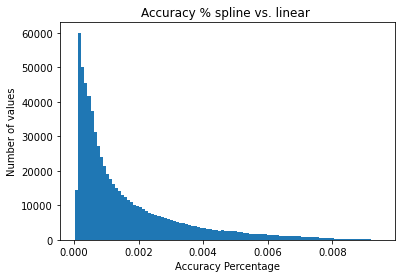

In [15]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plot = plt.hist(splineLinear, bins=100)

plt.ylabel("Number of values")
plt.xlabel("Accuracy Percentage")
plt.title("Accuracy % spline vs. linear ")
plt.savefig("Accuracy_spline_linear_.png")


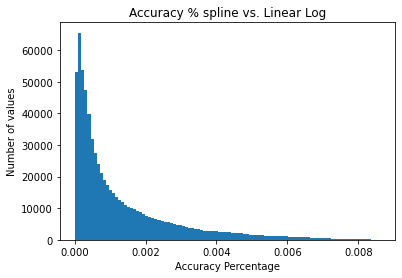

In [19]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plot = plt.hist(splineLinearLog, bins=100)

plt.ylabel("Number of values")
plt.xlabel("Accuracy Percentage")
plt.title("Accuracy % spline vs. Linear Log")
plt.savefig("Accuracy_spline_linear_Log_.png")

And calculating other values with accuracies

In [6]:
mean = statistics.mean(splineLinear)
stdev = statistics.stdev(splineLinear)
median = statistics.median(splineLinear)

print("MEAN:", mean)
print("STDEV:", stdev)
print("MEDIAN:", median)
print("MINIMUM:", min(splineLinear))
print("MAXIMUM:", max(splineLinear))

MEAN: 0.0016211265540896714
STDEV: 0.0016785839647129389
MEDIAN: 0.0009653076914118014
MINIMUM: 3.490627605245515e-05
MAXIMUM: 0.009467970353336382


In [7]:
mean = statistics.mean(splineLinearLog)
stdev = statistics.stdev(splineLinearLog)
median = statistics.median(splineLinearLog)

print("MEAN:", mean)
print("STDEV:", stdev)
print("MEDIAN:", median)
print("MINIMUM:", min(splineLinearLog))
print("MAXIMUM:", max(splineLinearLog))

MEAN: 0.0013483201465521754
STDEV: 0.0015182031848972517
MEDIAN: 0.0007317795663838841
MINIMUM: 1.767777776321799e-05
MAXIMUM: 0.008601693214460623
